# Credit Score Model Creation

This notebook contains the process of data preprocessing all the way to the final stage where the model is trained and tested. The dataset used in this project can be downloaded from the following URL: https://www.kaggle.com/c/home-credit-default-risk

In [1]:
# Importing required packages for model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from utils import split_data
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

### Reading and Visualizing Credit Data

In [2]:
application_data = pd.read_csv('./dataset/application_train.csv')
bureau_data = pd.read_csv('./dataset/bureau.csv')
application_data.head(10)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
bureau_data.head(10)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN


Finding variable counts for target field in dataset which represents whether the loan has been repaid or not. 0 represents repaid loan and 1 represents loan not paid.

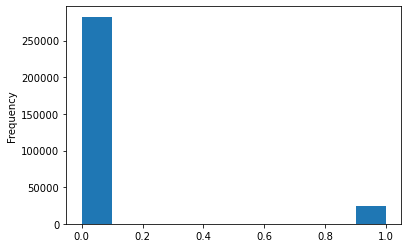

In [4]:
application_data['TARGET'].value_counts()
application_data['TARGET'].astype(int).plot(kind='hist')

plt.show()

In [5]:
# Create a function to explore missing values

def missing_values(df):
    miss_val = df.isnull().sum()
    miss_val_percentage = 100 * df.isnull().sum()/len(df)

    #create table with results
    miss_val_table = pd.concat([miss_val,miss_val_percentage], axis = 1)
    miss_val_table_cols = miss_val_table.rename(columns = {0: 'Missing Values', 1: 'Percentage Total'})
    miss_val_table_cols = miss_val_table_cols[miss_val_table_cols.iloc[:, 1] != 0].sort_values('Percentage Total', ascending=False).round(1)

    #Print Summary Information
    print("Data frame has " + str(df.shape[1]) + "columns. \n"
            "There are There are " + str(miss_val_table_cols.shape[0]) +
              " columns that have missing values ")

    return miss_val_table_cols

In [6]:
miss_values = missing_values(application_data)
miss_values.head(10)

Data frame has 122columns. 
There are There are 67 columns that have missing values 


,Missing Values,Percentage Total
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


Now we want to encode classification variables to numerical data

In [7]:
le = LabelEncoder()
le_count = 0

for col in application_data:
    if application_data[col].dtype == 'object':

        #if 2 or fewer unique categories
        if len(list(application_data[col].unique())) <= 2:

            #train on the training data
            le.fit(application_data[col])
            application_data[col] = le.transform(application_data[col])

            le_count += 1

print('%d columns were label encoded.' % le_count)


3 columns were label encoded.


In [8]:
application_data = pd.get_dummies(application_data)
bureau_data = pd.get_dummies(bureau_data)

print("Shape of application data", application_data.shape)
print("Shape of bureau data", bureau_data.shape)

Shape of application data (307511, 243)
Shape of bureau data (1716428, 37)


In [9]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0


Exploring data and finding anomalies

In [10]:
application_data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

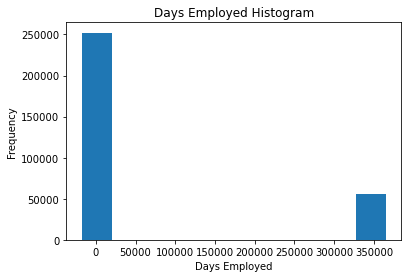

In [11]:
application_data['DAYS_EMPLOYED'].plot.hist(title = 'Days Employed Histogram')
plt.xlabel('Days Employed')
plt.show()

In [12]:
anom = application_data[application_data['DAYS_EMPLOYED'] == 365243]
non_anom = application_data[application_data['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


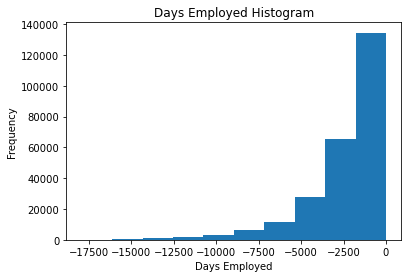

In [13]:
#create anomalies flag column
application_data['DAYS_EMPLOYED_ANOM'] = application_data['DAYS_EMPLOYED'] == 365243

#replace anomalous values with NAN
application_data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
application_data['DAYS_EMPLOYED'].plot.hist(title = 'Days Employed Histogram');
plt.xlabel('Days Employed')
plt.show()


### Model Taining Process

In [14]:
y= application_data['TARGET']
X = application_data.drop(['TARGET', 'CODE_GENDER_XNA', 'NAME_INCOME_TYPE_Maternity leave', 'NAME_FAMILY_STATUS_Unknown'], axis = 1)

In [15]:
imputer = SimpleImputer(strategy='median')
imputer.fit(X)
X = imputer.transform(X)

In [16]:
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = scaler.transform(X)


Splitting data into train and test sets. Will use function in `utils.py` for that

In [17]:
X_train, X_test, y_train, y_test = split_data(X,y, test_size = 0.2, random_state=42)

### Neural Network

In [22]:
model = Sequential()
model.add(Dense(240, input_dim=240, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 240)               57840     
                                                                 
 dropout_4 (Dropout)         (None, 240)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               61696     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)               

Using Adam Optimizer for training the   model

In [28]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [29]:
model.fit(X_train, y_train, epochs = 25, batch_size = 64)

Epoch 1/25
3844/3844 [==============================] - 15s 4ms/step - loss: 0.2684 - accuracy: 0.9189
Epoch 2/25
3844/3844 [==============================] - 14s 4ms/step - loss: 0.2587 - accuracy: 0.9192
Epoch 3/25
3844/3844 [==============================] - 17s 4ms/step - loss: 0.2560 - accuracy: 0.9192
Epoch 4/25
3844/3844 [==============================] - 16s 4ms/step - loss: 0.2553 - accuracy: 0.9190
Epoch 5/25
3844/3844 [==============================] - 16s 4ms/step - loss: 0.2550 - accuracy: 0.9190
Epoch 6/25
3844/3844 [==============================] - 16s 4ms/step - loss: 0.2541 - accuracy: 0.9190
Epoch 7/25
3844/3844 [==============================] - 17s 4ms/step - loss: 0.2532 - accuracy: 0.9189
Epoch 8/25
3844/3844 [==============================] - 17s 4ms/step - loss: 0.2527 - accuracy: 0.9190
Epoch 9/25
3844/3844 [==============================] - 16s 4ms/step - loss: 0.2527 - accuracy: 0.9189
Epoch 10/25
3844/3844 [==============================] - 16s 4ms/step - l

In [30]:
evl = model.evaluate(X_test, y_test)

1922/1922 [==============================] - 8s 4ms/step - loss: 0.2740 - accuracy: 0.9196


In [31]:
print("Accuracy of simple Neural network is", evl[1])

Accuracy of simple Neural network is 0.9195649027824402
